In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
data = np.loadtxt("data/ex2data1.txt",delimiter=',')
m = data.shape[0] # sample number

X = np.hstack((np.ones((m,1)),data[:,:2]))
y = data[:,-1]

n = X.shape[1] # feature number

In [115]:
def plotData(X,y):
    
    plt.plot(X[:,1:2][y == 1],X[:,2:3][y == 1],'k+',label='admitted')
    plt.plot(X[:,1:2][y == 0],X[:,2:3][y == 0],'yo',label='unadmitted')
    plt.xlabel("Exam 1 Score")
    plt.ylabel("Exam 2 Score")
    plt.legend()
    
    return


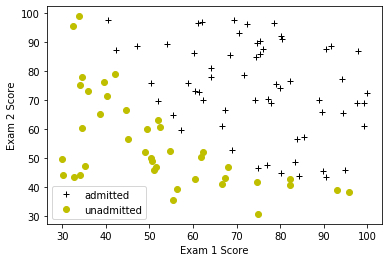

In [116]:
plotData(X,y)

## 1.2 Implementation

In [2]:
from scipy.special import expit #Vectorized sigmoid function

In [120]:
def h(theta,X):
    
    """
        theta: 1d array of n
        X: 2d of m by n
    """
    
    return expit(X @ theta) # return a 1d array of m



In [143]:
def costFunction(theta,X,y,mylambda = 0):
    
    """
        X: m by n
        y: m
        theta: n
        h: m
    """
    m = y.size
    term1 = np.log(h(theta,X)) @ (-y)
    term2 = np.log(1 - h(theta,X)) @ (1 - y)
    rgterm = (mylambda / (2 * m)) * (theta @ theta)
    
    return ((term1 - term2) / m + rgterm)


def gradFunction(theta,X,y,mylambda = 0):
    
    """
        X: m by n
        y: m
        theta: n
        h: m
    """
    
    m = y.size
    grad = (X.T @ (h(theta,X) - y)) / m + (mylambda / m) * theta  # for j >= 1
    grad[0] = (X[:,0] @ (h(theta,X) - y)) / m  # for j = 0
    
    return grad   # return a 1d array of n

In [149]:
# test costFunction
theta0 = np.zeros(n)  # 1d array of n
h(theta0, X)
print("Test for theta0 = [0,0,0]:")
print(f"costFunction = {costFunction(theta0,X,y)}")
print(f"gradient = {gradFunction(theta0,X,y)}")

Test for theta0 = [0,0,0]:
costFunction = 0.6931471805599453
gradient = [ -0.1        -12.00921659 -11.26284221]


In [162]:
from scipy.optimize import minimize,fmin

mylambda = 0.1
result = minimize(costFunction, x0=theta0, args=(X, y, mylambda), method='CG',
                  jac = gradFunction, options={'maxiter':400,'disp':True})


         Current function value: 0.322480
         Iterations: 22
         Function evaluations: 200
         Gradient evaluations: 187


C:\Users\lnl5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\lnl5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()


array([-25.15396244,   0.20617275,   0.20141196])

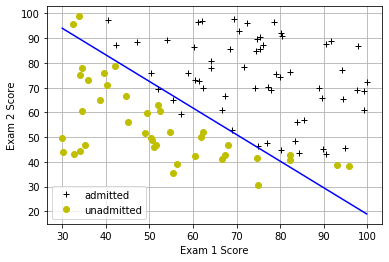

In [163]:
theta_o = result.x # optimized theta
plotx = np.linspace(X[:,1].min(),X[:,1].max(),100)
ploty = - (theta_o[0] + theta_o[1] * plotx) / theta_o[2]

plotData(X,y)
plt.plot(plotx,ploty,'b-')
plt.grid()

In [108]:
B = np.array([2,3])
B

array([2, 3])

In [165]:
data2 = np.loadtxt('data/ex2data2.txt',delimiter=',')

In [177]:
[m2,n2] = data2.shape
y2 = data2[:,-1]
X2 = np.hstack((np.ones((m2,1)),data2[:,:-1]))

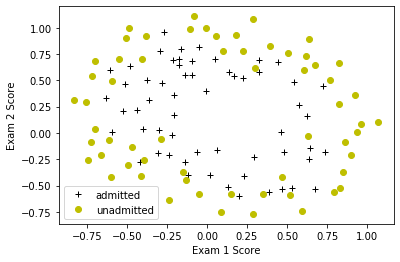

In [178]:
plotData(X2,y2)

In [258]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [259]:
#Create feature-mapped X matrix
mappedX = mapFeature(X2[:,1],X2[:,2])

[m2,n2] = mappedX.shape

In [266]:
mappedX[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

         Current function value: 0.535776
         Iterations: 8
         Function evaluations: 74
         Gradient evaluations: 64


In [276]:
theta2 = np.zeros(n2)
def plotBoundary(theta2,mappedX,y2,mylambda):

    result2 = minimize(costFunction, x0=theta2, args=(mappedX, y2, mylambda), method='CG',
                      jac = gradFunction, options={'maxiter':1000,'disp':True})

    theta2_o = result2.x

    plotx2 = np.linspace(X2[:,1].min(),X2[:,1].max(),100)
    ploty2 = np.linspace(X2[:,2].min(),X2[:,2].max(),100)
    plotz = np.zeros((len(plotx2),len(ploty2)))
    for i,x in enumerate(plotx2):
        for j,y in enumerate(ploty2):
            mapxy = mapFeature(np.array([x]),np.array([y]))
            plotz[i,j] = theta2_o @ mapxy.ravel()

    # plotz = mapFeature(plotx2,ploty2) @ theta2_o

    
    CS = plt.contour(plotx2,ploty2,plotz.T,[0])
    plt.clabel(CS, inline = 1, fontsize =10)
    
    return



         Current function value: 0.272516
         Iterations: 1000
         Function evaluations: 3675
         Gradient evaluations: 3675
         Current function value: 0.535776
         Iterations: 8
         Function evaluations: 74
         Gradient evaluations: 64
         Current function value: 0.652036
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 0.686548
         Iterations: 2
         Function evaluations: 45
         Gradient evaluations: 33


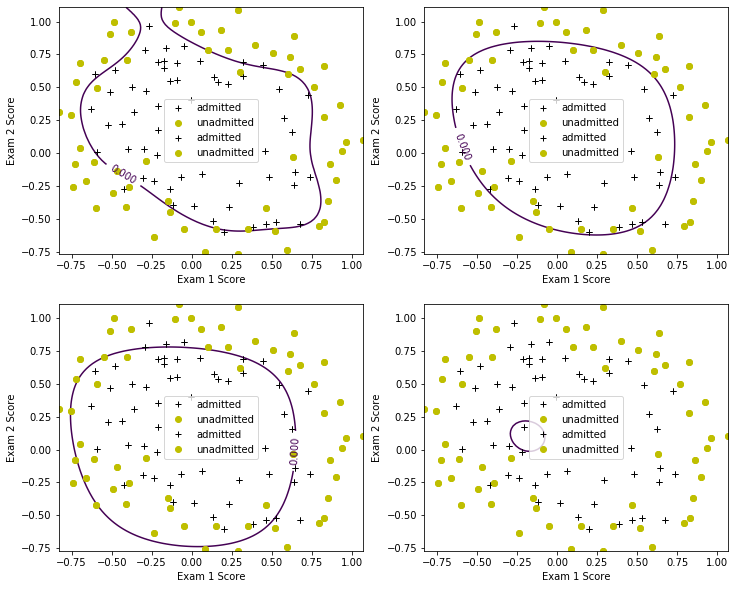

In [278]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(X2,y2)
plotBoundary(theta2,mappedX,y2,0.)

plt.subplot(222)
plotData(X2,y2)
plotBoundary(theta2,mappedX,y2,1.)

plt.subplot(223)
plotData(X2,y2)
plotBoundary(theta2,mappedX,y2,10.)

plt.subplot(224)
plotData(X2,y2)
plotBoundary(theta2,mappedX,y2,100.)

In [240]:
mapxy.ravel()

(28,)